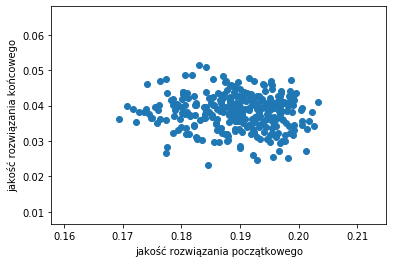

In [13]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open("../Results/InitialFinalScore/dc188.csv",'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))

plt.scatter(x,y)
plt.xlabel('jakość rozwiązania początkowego')
plt.ylabel('jakość rozwiązania końcowego')
plt.savefig('initial_final.pdf')
plt.show()